Szóval akkor az lesz a dolgom, hogy adott emisszióvonal bázison kapott együtthatókat kell kifejtenem, visszafejtenem aemisziós vonalak ekvivalens szélességeire. Ezen ekvivalens szélességekből nyílván megkapom az **EW**-t, mely az emissziós vonal kontinuumon felüli területére utal. Kell majd venni a helyi kontinuum fluxust, majd ezt kell szorozni az **EW**-vel, ez lesz a vonalon belüli terület. Ezt az alábbi integrálformulával számolhatjuk:
$$W_{\lambda}=\int (1-F_{\lambda}/F_0)d\lambda .$$
Ugye kérdés, hogy mettől meddig kell integrálni. Ehhez kell beadni a galaxis sebességdiszperzióját, mely ugye megadja a vonalkiszélesedést (nyílván a két szélső értéket), ezt az alábbi képlettel lehet majd számolni:
$$\frac{\Delta \lambda}{\lambda}=\frac{v}{c} .$$
Valahogy rá kéne ezt majd kötni a Gauss-görbére, mert ez még nem elegendő adat ahhoz, hogy konkréta számolni lehessen, de Gauss-t már lehet illeszteni. Ugye a Gauss-görbe egyenlete:
$$f(x)=ae^{-\frac{(x-b)^2}{2c^2}} .$$
Nyílván itt $b$ az adva lesz, csak fix hullámhosszakon jelennek meg a vonalak a c-t pedig én adom be, mint sebességdiszperziót. 

Az illesztett Gaussal számolni tudjuk az emissziós vonal területét, itt most legyen a $F_{0}$ a kontunuum átlag fluxusa egy adott hullámhossztartományon. Ekkor a vonal területe az ekvivalens szélesség definíciójából adódóan:
$$W_{\lambda}F_0 = \int  ae^{-\frac{(\lambda-\lambda_0)^2}{2\sigma ^2}} d\lambda .$$

Ugye itt mindkét oldal igazából a teljes fluxus a bal oldal definíció szerint, a jobbon meg látszik

Mivel tudjuk a sebességdiszperziót, ezért megvan az alsó és felső határ, numerikus integrálással megoldható az egyenlet $a$-ra, csak ismernünk kell a Gauss-görbe szélességét. Mivel a terület 99.7%-a 3$\sigma$-n belül van, ezért a két integrálási határ különbségének felének harmadát tekinthetjük a Gauss görbe szórásának, azaz
$$\sigma = \frac{\lambda_2-\lambda_0}{3}$$
Ha ez megvan, akkor csak visszanyúlunk az ekvivalens szélesség definíciójának integrálalakjához:
$$F_0 \int (1-F_{\lambda}/F_0)d\lambda =\int  ae^{-\frac{(\lambda-\lambda_0)^2}{2\sigma ^2}} d\lambda ,$$
ahonnét azt kapjuk, hogy az egyes $\lambda$-k esetén az alábbi módon számolható a fluxus:
$$F_0-F_{\lambda}=ae^{-\frac{(\lambda-\lambda_0)^2}{2\sigma ^2}} .$$
**FONTOS:** Definícióból adódóan nem mindegy, milyen típusú vonalakkal dolgozunk. Az adatbázisban pozitív értékek szerepelnek a log(EW)-kre, vagyis $W_{\lambda}$-t pozitívnak vette emissziós vonalakra, holott annak definíció szerint negatívnak kell lennie. Emiatt beleírok még egy negatív előjelet, a végső egyenlet így alakul:
$$F_{\lambda}-F_0=ae^{-\frac{(\lambda-\lambda_0)^2}{2\sigma ^2}} .$$

Tehát akkor az kell nekünk először, hogy amennyiben kapunk PCA együtthatókat a vonalak terében, akkor azokból visszaszámoljuk az **EW**-ket. Vagyis lejátszuk a PCA-t visszafelé. Ehhez be kell tölteni a sajátvektorokat, majd csak szorozgatni kell

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# lambd=[6565,4863,6718,6733,4342,3727,5008,4960,6585,6550]
lambd=[3727,4342,4863,4960,5008,6550,6565,6585,6718,6733]
egyhat=numpy.load('./PCAfeldolgozas/PCAemissGX1.npy')
V=numpy.load('./PCAfeldolgozas/EmissV.npy')
atlag=numpy.load('./PCAfeldolgozas/emissatlag.npy')

In [3]:
print(egyhat)

[ 0.81135257 -1.32310758 -0.14490638 -0.21239023  0.02867741 -0.06997185
  0.177512    0.0622921   0.06276079  0.0187352 ]


In [4]:
print(atlag)

[[  3.72700000e+03   2.63922403e+00]
 [  4.34200000e+03   1.07927716e+00]
 [  4.86300000e+03   1.89984002e+00]
 [  4.96000000e+03   1.72868156e-01]
 [  5.00800000e+03   1.26587164e+00]
 [  6.55000000e+03   8.65347612e-01]
 [  6.56500000e+03   3.17520272e+00]
 [  6.58500000e+03   2.03403502e+00]
 [  6.71800000e+03   1.47239231e+00]
 [  6.73300000e+03   1.12899126e+00]]


In [5]:
EWk=numpy.dot(V.T,egyhat)
# print(EWk)

In [6]:
EWk=EWk+atlag[:,1]

In [7]:
print(EWk)

[ 2.0115    1.14995   2.067    -0.744458  0.184125  1.05734   3.33148
  2.17149   1.44231   1.15532 ]


A kontinuumot itt kreálom meg, itt most konstans 1, de be lehet olvasni is, és egy adott intervallumra átlagolom az ekvivalens szélességhez.

In [8]:
content = numpy.load('./PCAfeldolgozas/ujramint_spektrumok.npy').item()
GX1=content[0]
del content

In [9]:
mintapontok=linspace(3724,6760.6,5062)
# Fcont=numpy.empty((5062,1))
# Fcont[:]=1
Kontinuum=numpy.empty((5062,2))
Kontinuum[:,0]=mintapontok[:]
Kontinuum[:,1]=GX1[:,1]              # a már újramintavételezett kontinuum modellt veszem fel

Amiket most kaptunk azok a log(**EW**)-k, ezekből ki kell számolni mindenek előtt az **EW**-ket

In [10]:
EW=numpy.exp(EWk)
print(EW)

[  7.47452072   3.158035     7.90108427   0.47499168   1.20216608
   2.87870344  27.97972106   8.77134361   4.23045689   3.17503927]


Most ki kell számolni a Gauss-görbe $a$-ját

In [11]:
from scipy.integrate import quad

In [12]:
def interpol(x1,x2,y1,y2,xk):
    a=(y2-y1)/(x2-x1)
    b=y1-x1*(y2-y1)/(x2-x1)
    
    yx=a*xk+b
    
    return(yx)

In [13]:
Spektrum=numpy.empty((5062,2))
Spektrum[:,0]=mintapontok[:]

Spektrum[:,1]=Kontinuum[:,1]

In [14]:
def integrand(x, sig, l0):
    return(numpy.exp(-(x-l0)**2 / (2*sig**2)))

sigma=200                     # gx sebsségdiszperziója

Emiss={}                      # dictionary az emissziós vonalak tárolására

for j in range (0,10):
    l0=lambd[j]                   # emissziós vonal hullámhossza
    dellambd=l0*sigma/300000
    l1=l0-dellambd                # alsó integrálási határ
    l2=l0+dellambd                # felső integrálási határ
    sig=(l2-l0)/3                 # Gauss szórása
    W=EW[j]

    I=quad(integrand, l1, l2, args=(sig, l0))    # Gauss integrál számolása

    integ=I[0]                                   # quad több értékkel tér vissza, ebből veszem az elsőt

    F0=0
    w=0
    for q in range (0,5062):
        if(Kontinuum[q,0]>l1 and Kontinuum[q,0]<l2):         # számolok egy átlagkontinuumot a vonal környezetében (a vonal alatt)
            F0+=Kontinuum[q,1]
            w+=1
    F0=F0/w

    a=F0*W/integ                   # Gauss együtthatója

    Flamb=numpy.empty((1000,1))                                 # kiszámolom a csúcs fluxusait
    lamb=linspace(l1,l2,1000)
    for i in range (0,1000):
        Flamb[i]=F0+a*numpy.exp(-(lamb[i]-l0)**2 / (2*sig**2))
    
    vonal=numpy.empty((1000,2))
    vonal[:,0]=lamb[:]
    vonal[:,1]=Flamb[:,0]

    d=0
    for q in range (0,5062):                                 # hány mintavételezési pont esik a vonal alá
        if(mintapontok[q]>l1 and mintapontok[q]<l2):
            d+=1
        
    temp=vonal
    v=0
    umvonal=numpy.empty((d,2))                               # újramintavételezem a vonalat a spektrum binelésére
    for q in range (0,5062):
        xk=mintapontok[q]
        w=0
        while(w<999):
            if(xk>temp[w,0] and xk<temp[w+1,0]):
                yk=interpol(temp[w,0],temp[w+1,0],temp[w,1],temp[w+1,1],xk)
                umvonal[v,0]=xk
                umvonal[v,1]=yk
                v+=1
                break
            w+=1
    t=0  
    for q in range (0,5062):                               # ráteszem a vonalat a spektrumra
        if(Kontinuum[q,0]>l1 and Kontinuum[q,0]<l2):
            Spektrum[q,1]+=umvonal[t,1]
            t+=1      
            
    Emiss[j]=umvonal
    del temp
    del vonal
    del umvonal

(0, 7.5)

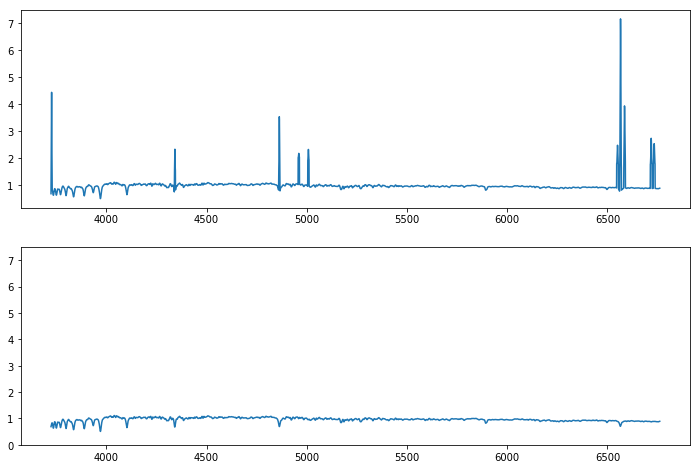

In [15]:
figsize(12,8)
figure(1)
subplot(211)
plot(Spektrum[:,0],Spektrum[:,1])
subplot(212)
plot(Kontinuum[:,0],Kontinuum[:,1])
ylim(0,7.5)

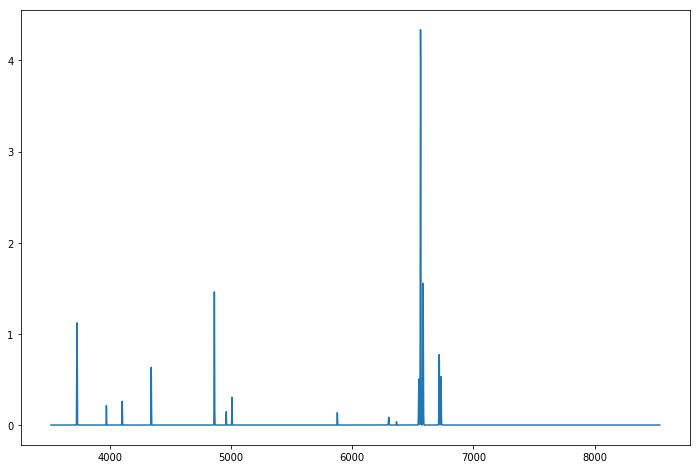

In [16]:
content=loadtxt('./SDSS/GX1.dat')
array=content[:,[0,8]]
plot(array[:,0],array[:,1])